# Titanic Data Analysis Project
    
This notebook performs an analysis on the Titanic dataset. It includes:
- **Loading the dataset**
- **Exploratory Data Analysis (EDA)**
- **Data Visualization**
- **Preprocessing & Feature Engineering**
- **Building a Logistic Regression Model**
- **Evaluating the Model**

Let's get started!
    

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Print library versions
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)
    

pandas version: 2.0.3
numpy version: 1.24.3
seaborn version: 0.12.2


In [2]:
# Load the Titanic dataset from Seaborn's built-in datasets
titanic = sns.load_dataset('titanic')

# Display the first 5 rows
print('First 5 rows of the Titanic dataset:')
display(titanic.head())
    

First 5 rows of the Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Dataset exploration

# Shape of the dataset
print('Dataset shape:', titanic.shape)

# Summary information
print('\nDataset Info:')
titanic.info()

# Summary statistics
print('\nSummary Statistics:')
display(titanic.describe(include='all'))

# Checking missing values
print('\nMissing Values:')
print(titanic.isnull().sum())
    

Dataset shape: (891, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Summary Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


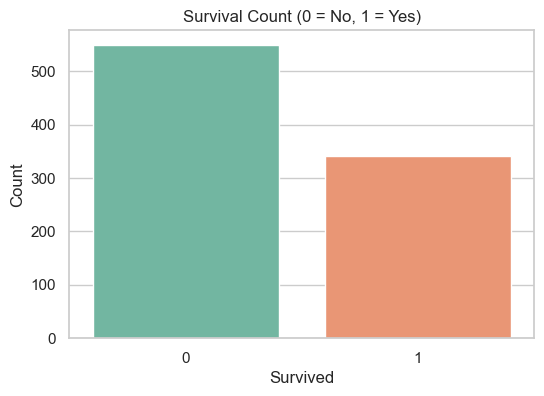

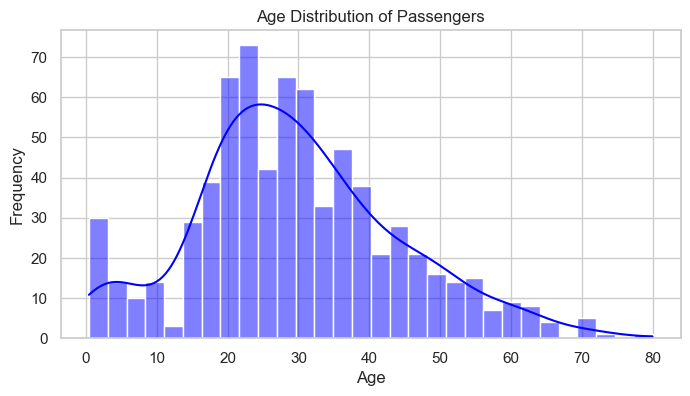

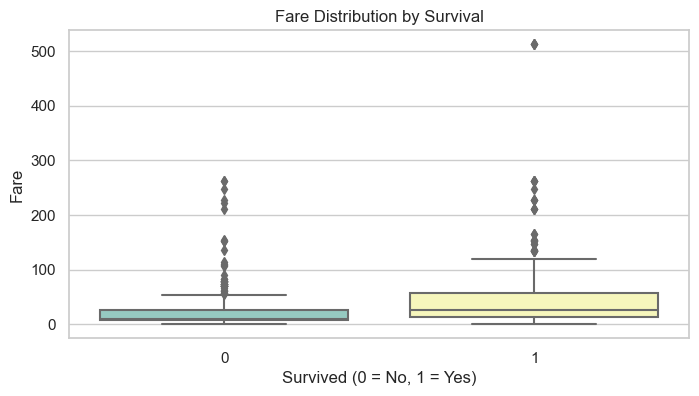

In [4]:
# Visualizing the dataset

# Count plot for survival
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic, palette='Set2')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Age distribution histogram
plt.figure(figsize=(8, 4))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for fare by survival
plt.figure(figsize=(8, 4))
sns.boxplot(x='survived', y='fare', data=titanic, palette='Set3')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()
    

In [5]:
# Data Preprocessing

# Selecting relevant features
data = titanic[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].copy()

# Handling missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Checking missing values again
print('Missing values after handling:')
print(data.isnull().sum())

# Encoding categorical variables
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)

# Display first few rows of processed data
display(data.head())
    

Missing values after handling:
survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64


,survived,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,True,False,True
1,1,1,38.0,71.2833,False,False,False
2,1,3,26.0,7.9250,False,False,True
3,1,1,35.0,53.1000,False,False,True
4,0,3,35.0,8.0500,True,False,True


In [6]:
# Building a Logistic Regression Model

# Define features and target variable
X = data.drop('survived', axis=1)
y = data['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy: {:.2f}%'.format(accuracy * 100))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
    

Model Accuracy: 79.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[88 17]
 [19 55]]


## Conclusion

In this analysis, we:
- Loaded and explored the Titanic dataset
- Visualized key insights with various plots
- Preprocessed the data by handling missing values and encoding categorical features
- Built a Logistic Regression model to predict survival
- Evaluated the model using accuracy, classification report, and confusion matrix


    